In [7]:
import geopandas as gpd
import pandas as pd 
import matplotlib.pyplot as  plt
import contextily as cx 
from matplotlib.colors import LinearSegmentedColormap

In [2]:
state_fips = [x for x in range(1,57)]
remove = [2,3,7,14,15,43,52]
for x in remove:
    state_fips.remove(x)
state_fips = [str(x).zfill(2) for x in state_fips]
files = ["shapefile/tl_2021_{}_tract".format(x) for x in state_fips]


In [3]:
gdf = gpd.GeoDataFrame()
for file in files:
    data = gpd.read_file(file)
    gdf = gdf.append(data)

In [4]:
fd = pd.read_csv("data.csv",usecols=[1,4])
fd['CensusTract'] = fd['CensusTract'].astype('str')
fd['CensusTract'] = fd['CensusTract'].apply(lambda x: x.zfill(11))
fd.head()

,CensusTract,LILATracts_1And10
0,01001020100,0
1,01001020200,0
2,01001020300,0
3,01001020400,0
4,01001020500,0


In [5]:
df = gdf.merge(fd, left_on = 'GEOID', right_on = 'CensusTract')

(20.0, 50.0)

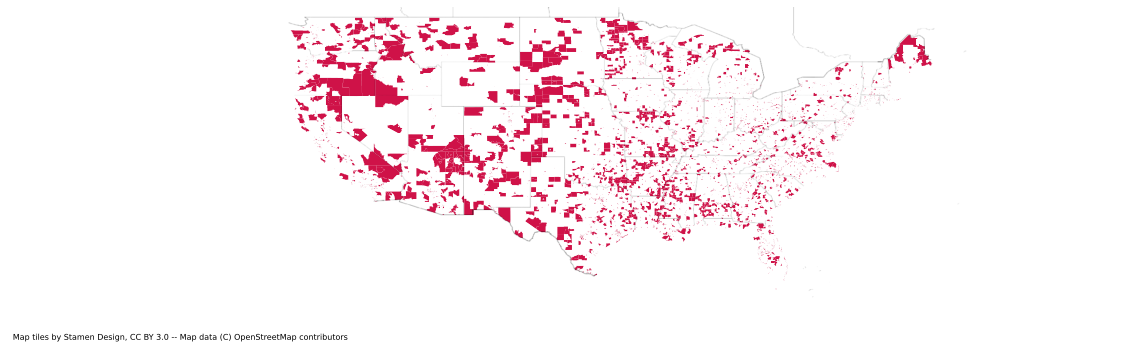

In [43]:
# Create an array with the colors you want to use
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, '#ffffff'), (1, '#cf1248')])

# template to plot the great paris map overlay
fig, ax = plt.subplots(figsize=(20,20 ))

#plot df 
df.plot(ax =ax ,column = "LILATracts_1And10",cmap = cmap
                                            #missing_kwds={"color": "#fffff"}
        )
# congestion.plot(ax = ax, alpha = 1, color = "none", edgecolor = '#b8ca7d', linewidth = 8)
# tunnel.plot(ax = ax, alpha = 0.5 , color = '#cf1248', linewidth = 25)
cx.add_basemap(ax, crs = "EPSG:4269", source = cx.providers.Stamen.TonerLines)

#Final touches
ax.set_axis_off()
ax.set_xlim(-150,-50)
ax.set_ylim(20,50)


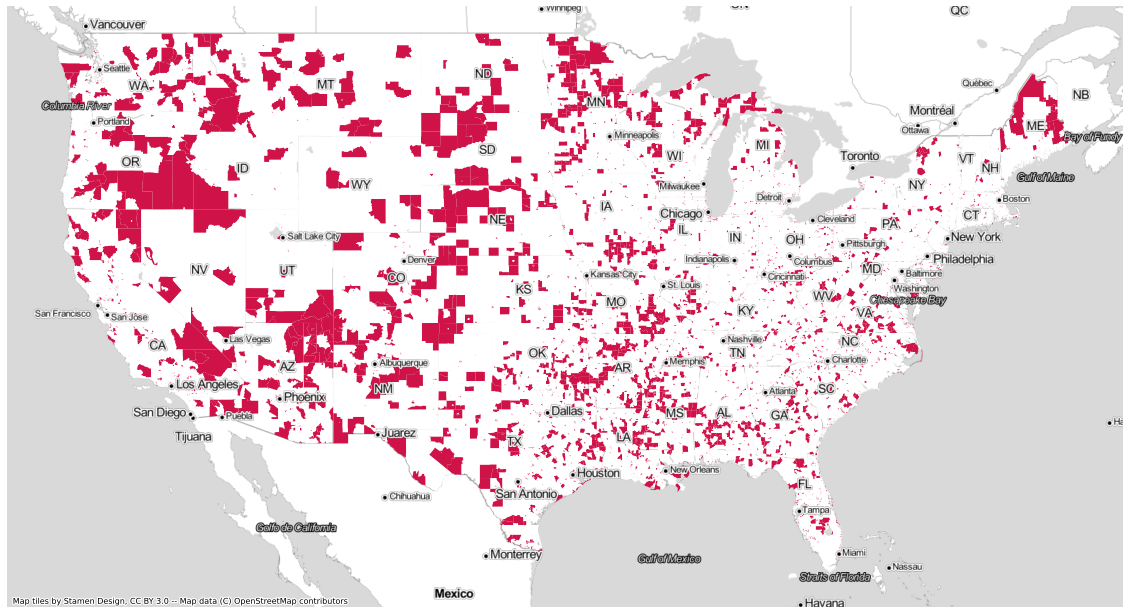

In [49]:
espg_3857 = df.to_crs("EPSG:3857")

# template to plot the great paris map overlay
fig, ax = plt.subplots(figsize=(20,20 ))

#plot df 
espg_3857.plot(ax =ax ,column = "LILATracts_1And10",cmap = cmap
                                            #missing_kwds={"color": "#fffff"}
        )
# congestion.plot(ax = ax, alpha = 1, color = "none", edgecolor = '#b8ca7d', linewidth = 8)
# tunnel.plot(ax = ax, alpha = 0.5 , color = '#cf1248', linewidth = 25)
cx.add_basemap(ax, crs = "EPSG:3857", source = cx.providers.Stamen.TonerLite)
cx.add_basemap(ax, crs = "EPSG:3857", source = cx.providers.Stamen.TonerLabels)

#Final touches
ax.set_axis_off()



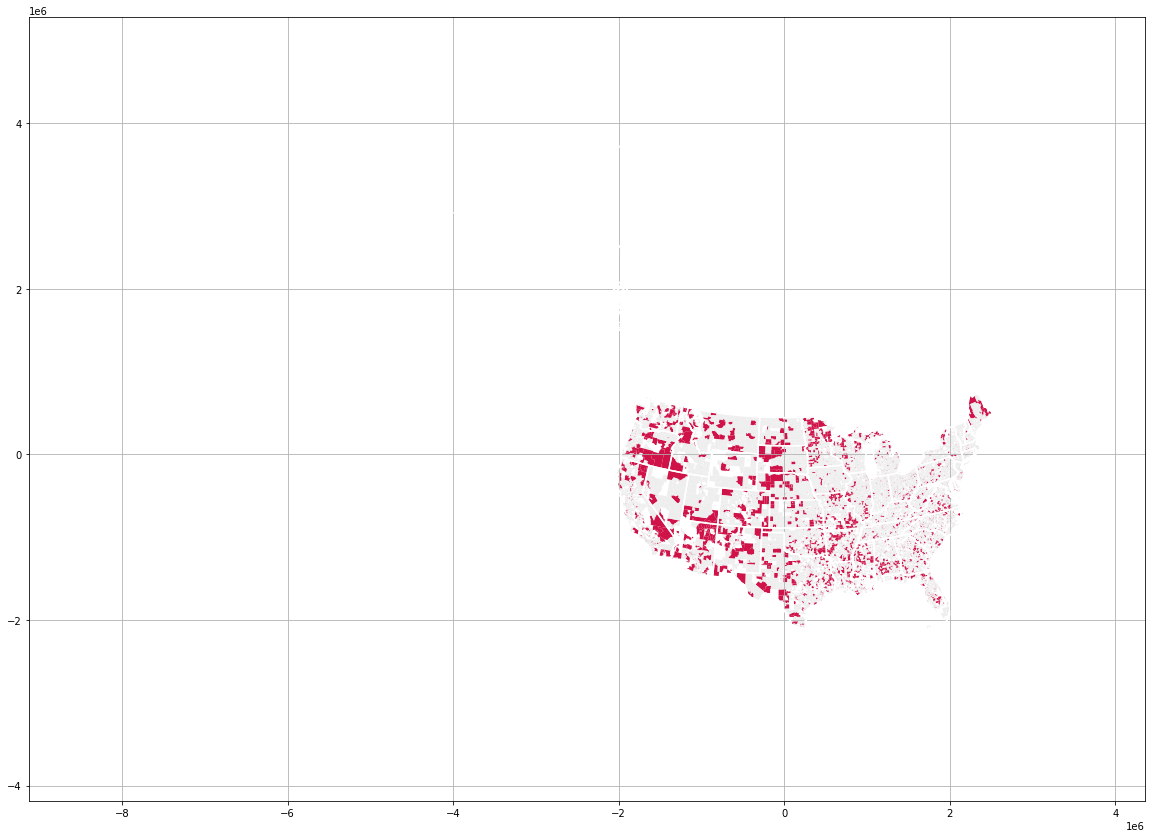

In [63]:
state = gpd.read_file("shapefile/cb_2018_us_state_5m")
state = state.to_crs("EPSG:2163")

espg_2163 = df.to_crs("EPSG:2163")

# template to plot the great paris map overlay
fig, ax = plt.subplots(figsize=(20,20 ))

#plot df 
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, '#eeeeee'), (1, '#cf1248')])
espg_2163.plot(ax =ax ,column = "LILATracts_1And10",cmap = cmap
                                            #missing_kwds={"color": "#fffff"}
        )

state.boundary.plot(ax=ax, edgecolor = "#FFFFFF")


#Final touches
ax.grid()



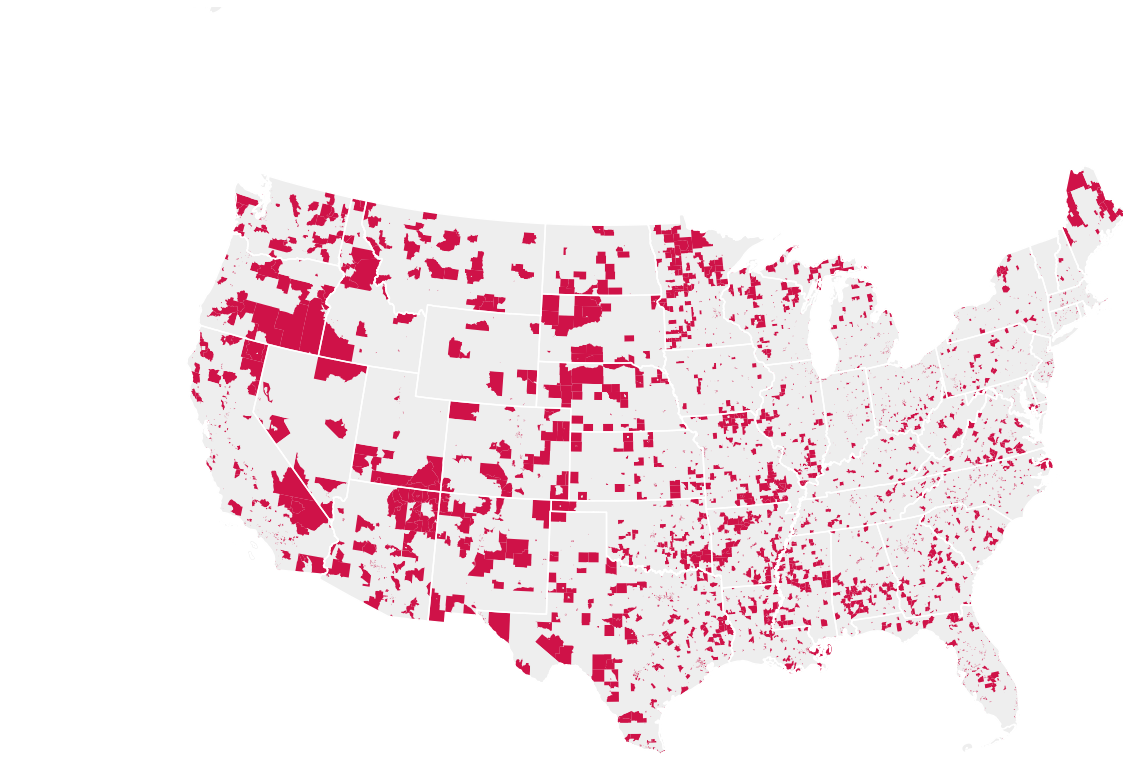

In [72]:
# template to plot the great paris map overlay
fig, ax = plt.subplots(figsize=(20,20 ))

#plot df 
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, '#eeeeee'), (1, '#cf1248')])
state.plot(ax=ax, color = "#eeeeee")
espg_2163.plot(ax =ax ,column = "LILATracts_1And10",cmap = cmap
                                            #missing_kwds={"color": "#ccccc"}
        )

state.boundary.plot(ax=ax, edgecolor = "#FFFFFF")

#Final touches
ax.set_axis_off()
ax.set_xlim(-2900000,2500000)
ax.set_ylim(-2200000,1500000)
fig.savefig("food_desert_map.png",dpi = 300, transparent = True)

(-2200000.0, 1500000.0)

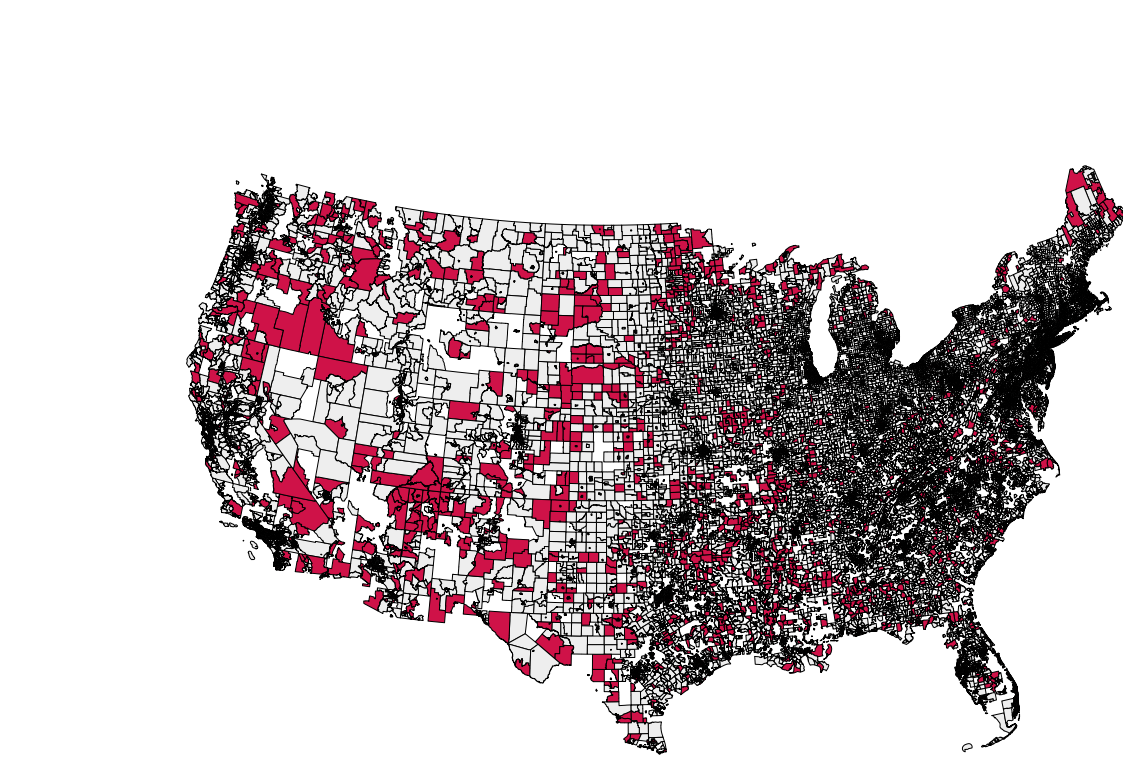

In [8]:
espg_2163 = df.to_crs("EPSG:2163")
# template to plot the great paris map overlay
fig, ax = plt.subplots(figsize=(20,20 ))

#plot df 
cmap = LinearSegmentedColormap.from_list('mycmap', [(0, '#eeeeee'), (1, '#cf1248')])

espg_2163.plot(ax =ax ,column = "LILATracts_1And10",cmap = cmap, edgecolor = '#000000'
                                            #missing_kwds={"color": "#ccccc"}
        )


#Final touches
ax.set_axis_off()
ax.set_xlim(-2900000,2500000)
ax.set_ylim(-2200000,1500000)

